# 🤖 Matthews Correlation Coefficient (MCC) 

Bu Jupyter defteri, **Matthews Correlation Coefficient (MCC)** kavramını açıklamak ve nasıl hesaplandığını öğretmek için hazırlanmıştır.  


---

## 📌 MCC Nedir?

Matthews Correlation Coefficient (MCC), ikili sınıflandırma problemlerinde performansı ölçmek için kullanılan bir metriktir.  
Karmaşıklık matrisinin (confusion matrix) **tüm bileşenlerini (TP, TN, FP, FN)** dikkate alır.

MCC, aşağıdaki gibi hesaplanır:

MCC = (TPxTN – FPxFN) / √ (TP+FP)(TP+FN)(TN+FP)(TN+FN)

TP : Gerçek pozitiflerin sayısı
TN : Gerçek negatiflerin sayısı
FP : Yanlış pozitif sayısı
FN : Yanlış negatiflerin sayısı

- +1 → Mükemmel tahmin
-  0 → Rastgele tahmin
- -1 → Tamamen ters tahmin (çok kötü)

---

## 🎯 Neden MCC?

- Dengesiz veri setlerinde accuracy yanıltıcı olabilir.
- F1-score sadece pozitif sınıfa odaklanır.
- MCC ise **tüm sınıflar ve hata türlerini** hesaba katar.


In [1]:
# Gerekli kütüphaneleri içe aktaralım
from sklearn.datasets import make_classification  # Veri seti oluşturmak için
from sklearn.linear_model import LogisticRegression  # Lojistik regresyon modeli
from sklearn.model_selection import train_test_split  # Eğitim-test bölme
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay  # Konfüzyon matrisi
from sklearn.metrics import matthews_corrcoef, accuracy_score  # MCC ve accuracy metrikleri
import matplotlib.pyplot as plt  # Görselleştirme için
import numpy as np  # Sayısal işlemler için

# Dengesiz bir veri seti oluşturalım (%90 sınıf 0, %10 sınıf 1)
X, y = make_classification(n_samples=1500,  # toplam örnek sayısı
                           n_features=6,  # 6 özellik (feature)
                           n_informative=4,  # bilgi içeren 4 özellik
                           n_redundant=0,  # fazlalık bilgi yok
                           weights=[0.9, 0.1],  # sınıf dağılımı: %90 - %10
                           random_state=42)  # tekrar üretilebilirlik için sabit tohum

# Veriyi eğitim ve test olarak ayıralım (%70 eğitim, %30 test)
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=42)


Accuracy: 0.9178
Matthews Correlation Coefficient (MCC): 0.4735


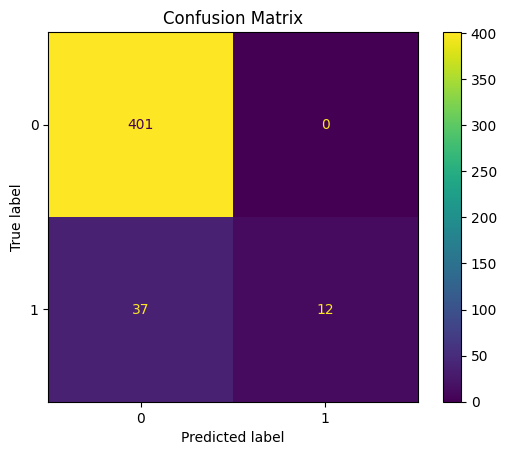

In [2]:
# Lojistik regresyon modelini oluşturalım
clf = LogisticRegression(max_iter=1000)  # maksimum iterasyon sayısını artırdık
clf.fit(X_train, y_train)  # modeli eğit

# Test verisi üzerinde tahmin yapalım
y_pred = clf.predict(X_test)

# MCC ve Accuracy değerlerini hesaplayalım
mcc = matthews_corrcoef(y_test, y_pred)  # MCC metriği
acc = accuracy_score(y_test, y_pred)  # klasik doğruluk metriği

# Sonuçları yazdıralım
print(f"Accuracy: {acc:.4f}")
print(f"Matthews Correlation Coefficient (MCC): {mcc:.4f}")

# Konfüzyon matrisini hesaplayalım ve çizdirelim
cm = confusion_matrix(y_test, y_pred)  # TP, TN, FP, FN bilgileri içerir
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix")
plt.show()

# --- Açıklama ---
# Accuracy çoğunluk sınıfı doğru tahmin ettiği için yüksek olabilir.
# MCC, dengesizlikten etkilenmez ve tüm hata türlerini hesaba katar.


## 📌 MCC Sonuçlarının Yorumlanması

✅ Accuracy yüksek görünüyor (%91.78) çünkü model büyük çoğunluğu oluşturan negatif (0) sınıfı çok doğru tahmin etmiş.

❌ Ancak pozitif sınıfta (1):

49 örnekten sadece 12’si doğru, 37’si yanlış tahmin edilmiş.

🟡 MCC (0.47) orta seviyede çünkü:

MCC hem True Negative (401) hem de False Negative (37) ve True Positive (12) değerlerini birlikte değerlendiriyor.

Azınlık sınıfa dair yüksek hata MCC’yi aşağı çekiyor.


📌 Sonuç:
Bu model çoğunluk sınıfı çok iyi tahmin ediyor ama azınlık sınıfta ciddi başarısızlık gösteriyor.
MCC bu yüzden accuracy’ye kıyasla çok daha düşük.
Bu, dengesiz veri setlerinde MCC’nin önemini çok iyi gösteren bir örnektir.

---

## ✅ Özet

- MCC, klasik Accuracy'den daha adil bir ölçüdür.
- Sağlık, dolandırıcılık tespiti gibi kritik uygulamalarda tercih edilir.
- Hem pozitif hem negatif sınıfı dengeli değerlendirir.

---


Bu notebook [MIT Lisansı](https://opensource.org/licenses/MIT) ile lisanslanmıştır.

---

_Notebook son güncelleme tarihi: 2025-07-15 18:14_ ✨
